In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import plotly.express as px
import pandas as pd

# Load the digits dataset
digits = load_digits()
data = digits.data
labels = digits.target

# Filter only digits 1 and 7
mask = np.isin(labels, [1, 7])
filtered_data = data[mask]
filtered_labels = labels[mask]

print("Filtered data shape:", filtered_data.shape)  # Should show fewer samples

# Perform PCA on filtered data
pca = PCA(n_components=3)
pca_data = pca.fit_transform(filtered_data)

# Create DataFrame for visualization
df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
df["Label"] = filtered_labels.astype(str)  # Use string for discrete color mapping

# Plot interactive 3D scatter plot
fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color="Label",
                    title="PCA Visualization of Digits 1 and 7",
                    color_discrete_map={"1": "blue", "7": "red"})
fig.show()


Filtered data shape: (361, 64)


/tmp/ipython-input-4242738397.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



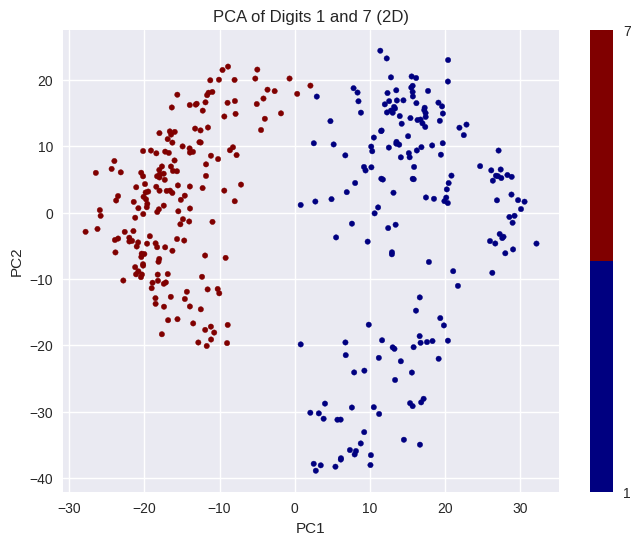

In [5]:


# Plot
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(8, 6))
c_map = plt.cm.get_cmap("jet", 2)  # Only 2 colors for digits 1 and 7

# Normalize label values to 0 and 1 for colormap indexing
label_map = {1: 0, 7: 1}
mapped_labels = np.vectorize(label_map.get)(filtered_labels)

scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], s=15, c=mapped_labels, cmap=c_map)
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.ax.set_yticklabels(['1', '7'])  # Label colorbar ticks

plt.title("PCA of Digits 1 and 7 (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
